## Camera trap image processing

In this notebook, we will use images to classify animals.

### Image processing
Image processing is a method to perform some operations on an image in order to get an enhanced image or extract useful information from the image. The input is usually an image and the output will either be an enhanced image or features associated with that image.

A person can interpret an image quite easily. For example, if you get the image of a cat, you can easily tell it is a cat depending on features such as the ears, eyes or whiskers. Computers don't see the world the same way we do.

### Image Classification
Image classification is where a computer can analyse an image and identify the class the image falls under or a probability of the image being part of a class.

Image classification is a key part of computer vision that allows computers to see the world as we do. 

Other applications of image classification include:

1. Healthcare: 
You can classify medical images and suggest whether they depict a symptom of an illnesss.
2. Self driving cars: 
They use image classification to identify what is around them.

### Deep Learning
Deep learning is a subset of artificial intelligence that allows machines to learn from data. Image classification with deep learning mostly involves [convolutional neural networks](https://www.thinkautomation.com/eli5/eli5-what-is-a-convolutional-neural-network/)(CNNs). Deep CNNs are a class of feed forward neural networks in which each layer of neurons uses convolution operations to extract information from overlapping small regions coming from previous layers.

For classification, the final layer is usually a softmax function, with an output between 0 and 1 per class, and with all the class outputs summing to 1. These outputs are the estimated probability of the image belonging to a certain class.

Deep learning allows machines to identify and extract features from images. They learn the features to look for in images by analysing lots of pictures.


### Pre-Trained Models
It is often necessary to have a large annotated dataset to solve a deep learning challenge. Incase you do not have a dataset large enough to train a model, you can use a pre-trained model.

A pre-trained model is a model created by someone else to solve a similar problem. Therefore, instead of building your own model from scratch, you can use the model trained on another problem as a starting point.

Many pre-trained architectures are directly available for us in the [Keras library](https://keras.io/). 

[ImageNet](https://www.image-net.org/challenges/LSVRC/) datset has been widely used to build various architectures since it is large enough (1.2 million images) to create a generalised model.

Pre-trained networks demonstrate a strong ability to generalize images outside the Imagenet dataset via transfer learning.

### Objectives
-  Use Keras to load a pre-trained model
-  Process our images to work with the pre-trained model
-  Use the pre-trained model to perform accurate inference on our images

### Load the model

We will start by downloading the model. Trained ImageNet models are available to download directly within the [Keras library](https://keras.io/api/applications/#available-models). Any of these models would work in our case. We will use [VGG16](https://keras.io/api/applications/#available-models).

In [20]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

Let's take a look at the model. Pay attention to the input layer (the first layer) and the output layer (the last layer). We need to make sure our images match the input dimensions that the model expects.

In [21]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Input dimensions
We can see that the model is expecting images in the shape (224,224,3) correspondint to 224 pixels high, 224 pixels wide and 3 colour channels. If we pass one image, it will be in the shape (1,224,224,3).

### Output dimensions
Our model will return a prediction of shape 1000. We have 1000 possible categories that the image will be placed in. Although the full ImageNet dataset has over 20,000 categories, resulting pretrained models use a subset of 1000 of these categories. Other possible categories can be found [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).

Animals we would like to classify from the data we collected in the conservancy are Impalas, Waterbucks, bushbucks, monkeys, warthogs and zebras.

### Load an Image

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(720, 1280, 3)


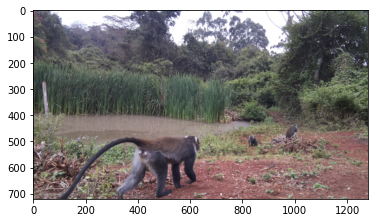

In [23]:
show_image("./camera/21Aug08_10_31_26.jpg")

### Preprocess the image

We need to pre process our image so that it is ready to be sent into the model. Our final shape should be the same as the input dimensions of our pretrained model.

In [24]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [25]:
processed_image = load_and_process_image("./camera/21Sep18_13_22_13.jpg")

Original image shape:  (720, 1280, 3)
Processed image shape:  (1, 224, 224, 3)


### Make a prediction

Now that our image is in the right format, we can pass it into our model to get a prediction.

In [27]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(69, 132, 3)
Original image shape:  (69, 132, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02391049', 'zebra', 0.61062026), ('n02114855', 'coyote', 0.057316612), ('n02117135', 'hyena', 0.055908304)]]


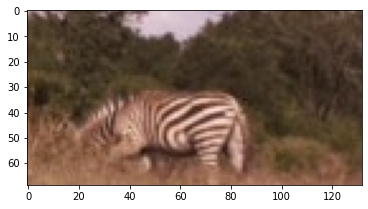

In [51]:
readable_prediction("./sample_data/21Jul01_15_52_16.jpg")

(720, 1280, 3)
Original image shape:  (720, 1280, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02422699', 'impala', 0.502468), ('n02423022', 'gazelle', 0.12695187), ('n02115913', 'dhole', 0.10021949)]]


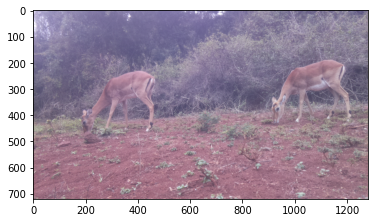

In [48]:
readable_prediction("./sample_data/21Sep05_10_30_13.jpg")

(720, 1280, 3)
Original image shape:  (720, 1280, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02397096', 'warthog', 0.41332853), ('n02504458', 'African_elephant', 0.2989005), ('n01871265', 'tusker', 0.13131551)]]


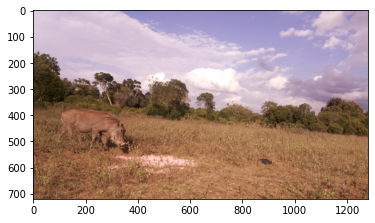

In [40]:
readable_prediction("./camera/21Jul01_16_52_09.jpg")

### Conclusion
Using pre-trained models is powerful, but sometimes, they are not a perfect fit for your data.
Here is where transfer learning comes through. Transfer learning allows you to tailor pretrained models to make good predictions for your data.